# Step 1: Import Libraries
We import the necessary Python libraries for data analysis, preprocessing, and model implementatio

In [23]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced visualization
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.linear_model import LinearRegression  # For Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # For performance evaluation

# Step 2: Load the Dataset
We load the dataset from a CSV file into a Pandas DataFrame.

In [5]:
# Step 2: Load the Dataset
file_path = '/content/BostonHousing.csv'
data = pd.read_csv(file_path)

# Step 3: Understand the Dataset
Check the dataset for missing values, data types, and overall structure.

In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [25]:
# Check for missing values
print(data.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [26]:
# Display summary statistics
print(data.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702085   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.210000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.618750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Step 4: Preprocessing the Dataset
Handle missing values, encode categorical variables, and normalize features.

## Handle Missing Values

In [27]:
# Drop rows with missing values (if any)
data.dropna(inplace=True)


## Encode Categorical Variables

In [28]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Encode categorical features (if present)
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


## Normalize Numerical Features

In [29]:
# Normalize numerical features for better performance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to all numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


# Step 5: Split Dataset into Features (X) and Target (y)
Separate the dataset into independent variables (X) and dependent variable (y).

In [31]:
# Separate target variable (e.g., 'MEDV') from features
X = data.drop('medv', axis=1)  # Replace 'MEDV' with your target column
y = data['medv']


# Step 6: Split Data into Training and Test Sets
Divide the dataset into training and testing subsets.

In [32]:
# Split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (404, 13) (404,)
Testing set shape: (102, 13) (102,)


# Step 7: Implement Linear Regression
Train the Linear Regression model on the training dataset.

In [33]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Display coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-0.22351315  0.06713146  0.02529546  0.06194635 -0.18564043  0.51368801
 -0.01318214 -0.35242409  0.13429595 -0.12397334 -0.19177699  0.10883182
 -0.40989331]
Intercept: 0.41444779198835324


# Step 8: Make Predictions
Use the trained model to predict values on the test dataset.

In [34]:
# Predict on test data
y_pred = model.predict(X_test)

# Display predictions
print("Predictions:", y_pred[:5])


Predictions: [0.53292042 0.68920515 0.21831798 0.44495413 0.30601719]


# Step 9: Evaluate Model Performance
Evaluate the model using Mean Squared Error (MSE) and R-squared (R²).

In [35]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (R²) value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Squared Error: 0.012051765525010605
R-squared: 0.6672089705941879


# Step 10: Visualize Results
Compare actual vs. predicted values visually.

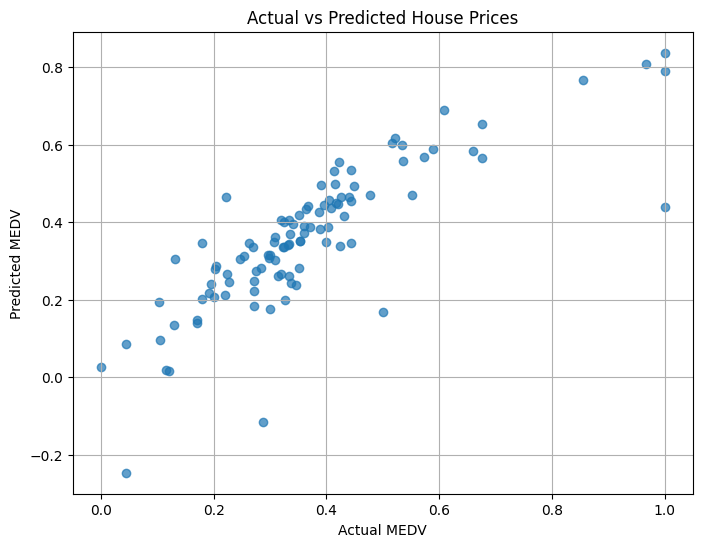

In [36]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


# Compare actual vs. predicted values visually, highlighting predicted points.

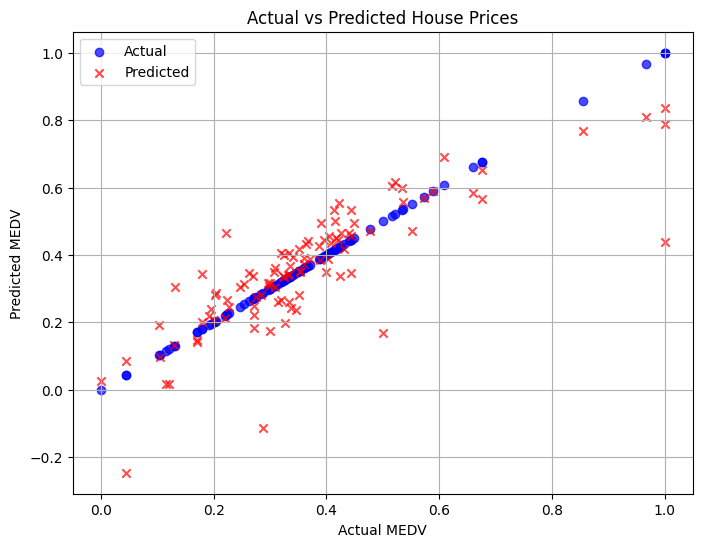

In [38]:
# # Step 10: Visualize Results (Modified for highlighting)
# Compare actual vs. predicted values visually, highlighting predicted points.
plt.figure(figsize=(8, 6))

# Plot actual values
plt.scatter(y_test, y_test, alpha=0.7, label="Actual", color='blue')

# Plot predicted values with a different color and marker
plt.scatter(y_test, y_pred, alpha=0.7, label="Predicted", color='red', marker='x')


plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.legend() # Show legend to distinguish actual and predicted
plt.show()

# Linear Regression Completed

# Step 7: Implement Linear Regression Using Gradient Descent
We implement Linear Regression manually using Gradient Descent to optimize weights (coefficients).

Code Explanation:
1.  Initialize weights and bias.
2.  Define the cost function (Mean Squared Error).
3.  Compute gradients for weights and bias.
4.  Update weights iteratively to minimize the cost.

In [39]:
# Gradient Descent Implementation
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    # Add bias term to X
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones for bias
    m, n = X_b.shape

    # Initialize weights
    theta = np.zeros(n)

    for i in range(iterations):
        # Compute predictions
        y_pred = X_b.dot(theta)

        # Calculate gradients
        gradients = (2/m) * X_b.T.dot(y_pred - y)

        # Update weights
        theta -= learning_rate * gradients

        # Optional: Track the cost function (can help in debugging)
        if i % 100 == 0:
            cost = np.mean((y_pred - y) ** 2)
            print(f"Iteration {i}: Cost = {cost}")

    return theta

# Apply Gradient Descent on Training Data
theta = gradient_descent(X_train.values, y_train.values, learning_rate=0.01, iterations=1000)
print("Optimized Coefficients (Theta):", theta)


Iteration 0: Cost = 0.19930372815059288
Iteration 100: Cost = 0.03464224081839735
Iteration 200: Cost = 0.027229286193235697
Iteration 300: Cost = 0.023981879117975613
Iteration 400: Cost = 0.022006645749112937
Iteration 500: Cost = 0.020535535456492914
Iteration 600: Cost = 0.019341607527087343
Iteration 700: Cost = 0.018340589219354556
Iteration 800: Cost = 0.017489554121936205
Iteration 900: Cost = 0.01676031384774198
Optimized Coefficients (Theta): [ 0.19703824 -0.03918633  0.06629374 -0.04222899  0.09840388 -0.02421756
  0.32145958  0.03328054  0.00804135 -0.00314588 -0.04675683 -0.10081451
  0.17865382 -0.21655804]


# Step 8: Best Fit Line
For visualization, calculate and plot the Best Fit Line over the data.

Code Explanation:
The best fit line is calculated using the predicted values from the gradient descent results.

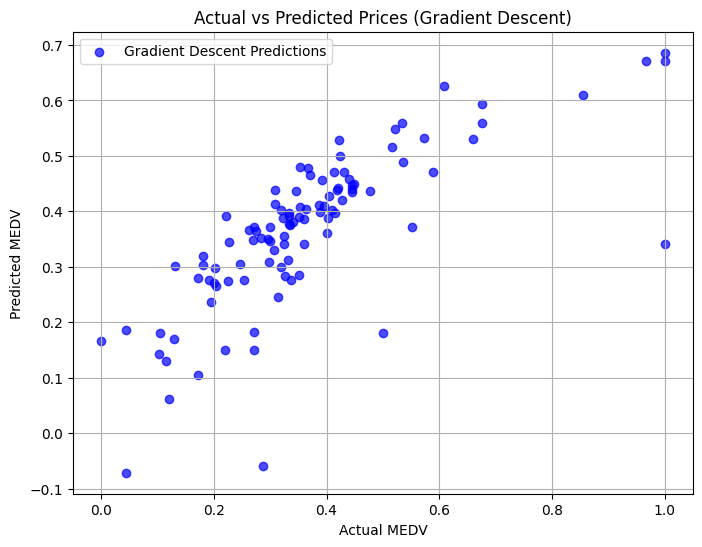

In [40]:
# Calculate predictions on test data for the best fit line
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test.values]  # Add bias
y_pred_gd = X_test_b.dot(theta)  # Predicted values using gradient descent

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gd, alpha=0.7, color='blue', label='Gradient Descent Predictions')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices (Gradient Descent)")
plt.legend()
plt.grid(True)
plt.show()


# Step 9: Compare Gradient Descent with Scikit-Learn Linear Regression
We now compare the manually implemented Gradient Descent with Scikit-Learn's Linear Regression.

In [41]:
# Predict using Scikit-Learn model
y_pred_sklearn = model.predict(X_test)

# Compare R-squared for Gradient Descent and Scikit-Learn
r2_gd = r2_score(y_test, y_pred_gd)
r2_sklearn = r2_score(y_test, y_pred_sklearn)

print("R-squared (Gradient Descent):", r2_gd)
print("R-squared (Scikit-Learn):", r2_sklearn)


R-squared (Gradient Descent): 0.5774087432999704
R-squared (Scikit-Learn): 0.6672089705941879


Iteration 0: Cost = 0.19930372815059288
Iteration 100: Cost = 0.03464224081839735
Iteration 200: Cost = 0.027229286193235697
Iteration 300: Cost = 0.023981879117975613
Iteration 400: Cost = 0.022006645749112937
Iteration 500: Cost = 0.020535535456492914
Iteration 600: Cost = 0.019341607527087343
Iteration 700: Cost = 0.018340589219354556
Iteration 800: Cost = 0.017489554121936205
Iteration 900: Cost = 0.01676031384774198


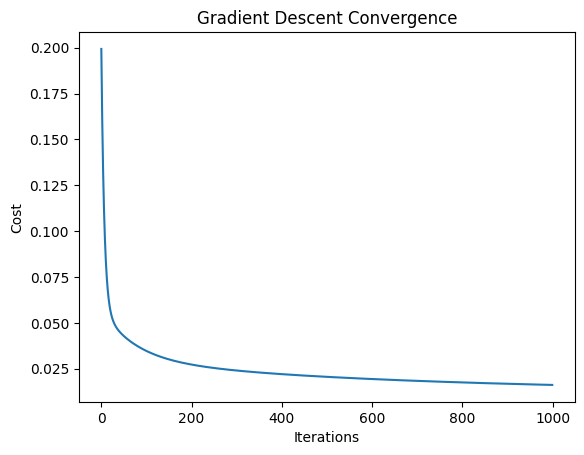

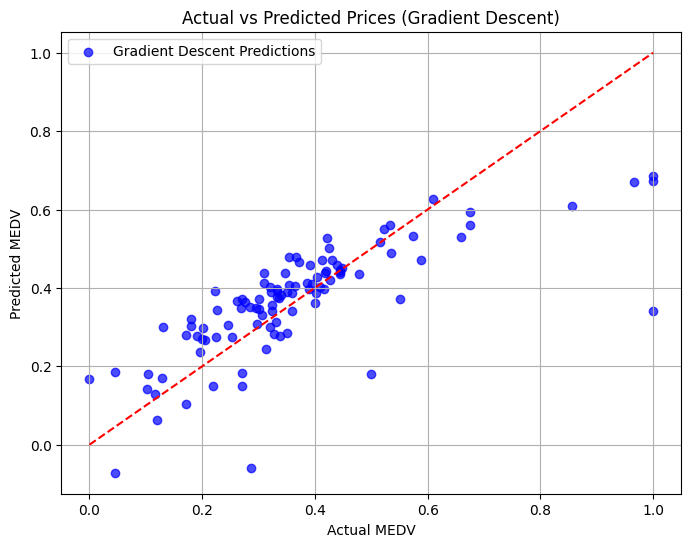

In [45]:
# prompt: Please visualizet the gradient descent steps and also the best fit line

import matplotlib.pyplot as plt

# Assuming 'theta' from gradient_descent and X_train, y_train are available

# ... (your existing code)

# Visualize Gradient Descent Steps (Example - Adapt as needed)
# Note: This is a simplified visualization. You might need to adjust based on your specific gradient descent implementation

# Extract relevant data (adjust as necessary based on your implementation)
#Example:
iterations = 1000
learning_rate = 0.01
costs = [] # Create an empty list to store costs

def gradient_descent_with_cost_tracking(X, y, learning_rate=0.01, iterations=1000):
    # Add bias term to X
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones for bias
    m, n = X_b.shape

    # Initialize weights
    theta = np.zeros(n)

    for i in range(iterations):
        # Compute predictions
        y_pred = X_b.dot(theta)

        # Calculate gradients
        gradients = (2/m) * X_b.T.dot(y_pred - y)

        # Update weights
        theta -= learning_rate * gradients

        # Calculate and store the cost function
        cost = np.mean((y_pred - y) ** 2)
        costs.append(cost) # Append the cost to the list

        # Optional: Track the cost function (can help in debugging)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return theta, costs

theta, costs = gradient_descent_with_cost_tracking(X_train.values, y_train.values, learning_rate=learning_rate, iterations=iterations)

plt.plot(range(iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Gradient Descent Convergence")
plt.show()

# Visualize the best fit line (using the final theta from gradient descent)
# ... (your existing code to plot the best fit line)
# Example plot (modify as per your existing code)
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Add bias
y_pred_gd = X_test_b.dot(theta)  # Predicted values using gradient descent


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gd, alpha=0.7, color='blue', label='Gradient Descent Predictions') # scatter plot of the predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # line of best fit
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted Prices (Gradient Descent)")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Save Results
Save predictions from both methods for review and further analysis.

In [42]:
# Save predictions as CSV
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted (Gradient Descent)": y_pred_gd,
    "Predicted (Scikit-Learn)": y_pred_sklearn
})
results.to_csv("model_predictions.csv", index=False)
print("Results saved to 'model_predictions.csv'")

Results saved to 'model_predictions.csv'


# Conclusion
In this project, we implemented Linear Regression on the Boston Housing dataset, focusing on both theoretical understanding and practical implementation. The workflow involved preprocessing the data, training the model using Scikit-Learn, and manually implementing Linear Regression with Gradient Descent. We visualized the relationship between actual and predicted prices using a Best Fit Line and compared the performance of Gradient Descent with the Scikit-Learn model using metrics like R-squared.

This step-by-step process not only demonstrates the fundamentals of Linear Regression but also provides insights into the mathematical underpinnings of Gradient Descent optimization. By combining manual and automated approaches, we have ensured a solid grasp of both theoretical and practical aspects of machine learning. The project is a valuable starting point for understanding predictive modeling and regression analysis.